# Load image and generate landmarks

In [99]:
import os
import math
import numpy as np
import face_recognition


LABELS = ['22q11','Angelman','Apert','CDL','Down','FragileX','Marfan','Progeria','Sotos','TreacherCollins','Turner','Williams']


def load_dataset(setPath):
    X = []
    y = []

    for label in LABELS:
        directory = os.path.join(setPath,label)
        for f in os.listdir(directory):
            path = os.path.join(directory,f)
            
            if os.path.isfile(path) and f != 'desktop.ini':
                
                # Extract landmarks
                image = face_recognition.load_image_file(path)
                face_locations = face_recognition.face_locations(image)
                face_landmarks_list = face_recognition.face_landmarks(image)

                # Iterate through detected faces
                keypoints = []
                for i in range(0,len(face_landmarks_list)):
                    location = face_locations[i]
                    landmarks = face_landmarks_list[i]
                    
                    cY = location[2] - location[0]
                    cX = location[1] - location[3]
                    
                    # Center and append to points list
                    first = True
                    transform = None
                    points = []
                    for featureType in landmarks.keys():
                        for point in landmarks[featureType]:
                            
                            if first: # convert first point distance to be 1
                                first = False
                                transform = 1.0 / math.sqrt((point[0] - cY)**2 + (point[1] - cX)**2)
                            
                            rectifiedPoint = [(point[0]- cY) / transform,(point[1] - cX) / transform]
                            
                            points = points + rectifiedPoint
    
                    # Store result
                    keypoints.append(points)

                # Append to dataset
                for facePoints in keypoints:
                    X.append(facePoints)
                    y.append(label)
    
    return np.array(X), np.array(y)

In [100]:
X_test, y_test = load_dataset('./data/raw/Test')
print(X_test.shape)
print(y_test.shape)

(312, 144)
(312,)


In [101]:
X_train, y_train = load_dataset('./data/raw/Train')
print(X_train.shape)
print(y_train.shape)

(1023, 144)
(1023,)


## SVM Approach

In [102]:
from sklearn.svm import LinearSVC

clf = LinearSVC(random_state=0, tol=1e-5, max_iter=10000)
clf.fit(X_train, y_train)
print(clf.coef_)
print(clf.intercept_)

[[-2.04110710e-03 -2.19361871e-04 -2.70698821e-03 ...  6.62100762e-05
  -2.05933429e-03 -3.04786815e-04]
 [ 3.46423478e-03 -2.02515013e-03 -6.39723136e-03 ... -4.30405492e-03
   3.50430563e-03  2.86440552e-04]
 [-6.36125226e-03  7.61776012e-03 -5.91368685e-03 ... -4.14543950e-03
  -1.15071326e-03 -8.74187118e-03]
 ...
 [ 5.38158807e-03 -4.13615998e-04 -7.63536569e-03 ... -5.11119713e-03
  -3.31961487e-03  6.42615858e-03]
 [ 1.49161652e-03  3.17094179e-03  1.16754263e-03 ... -3.46889454e-04
   2.11609361e-03 -7.35179872e-04]
 [-3.36100357e-03 -4.93749289e-03  2.06330692e-03 ...  1.85993108e-03
  -6.60270940e-03 -8.53428289e-03]]
[-0.00025969 -0.0100033  -0.00282155 -0.00560902 -0.00831437 -0.00067576
 -0.00118521 -0.00357452 -0.00072334 -0.00359186 -0.00022697 -0.00381314]


/home/curt/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [103]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


y_pred = clf.predict(X_train)

accuracy = accuracy_score(y_train, y_pred, normalize=False) / float(y_train.size)
print('accuracy',accuracy)

conf = confusion_matrix(y_train,y_pred)

accuracy 0.5757575757575758


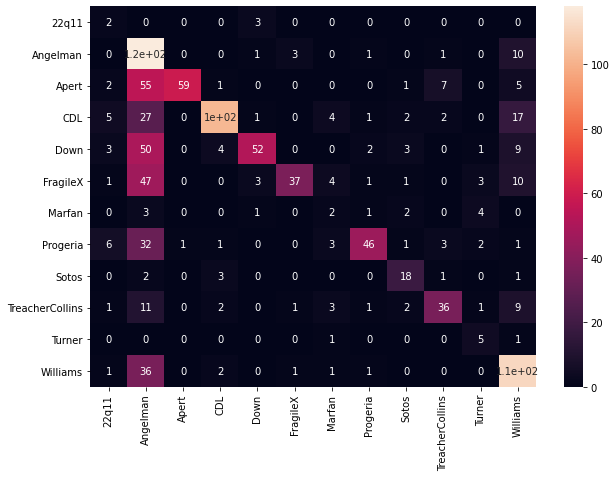

In [104]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(conf, index = [i for i in LABELS],
                  columns = [i for i in LABELS])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

In [105]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred, normalize=False) / float(y_test.size)
print('accuracy',accuracy)

conf = confusion_matrix(y_test,y_pred)

accuracy 0.4551282051282051


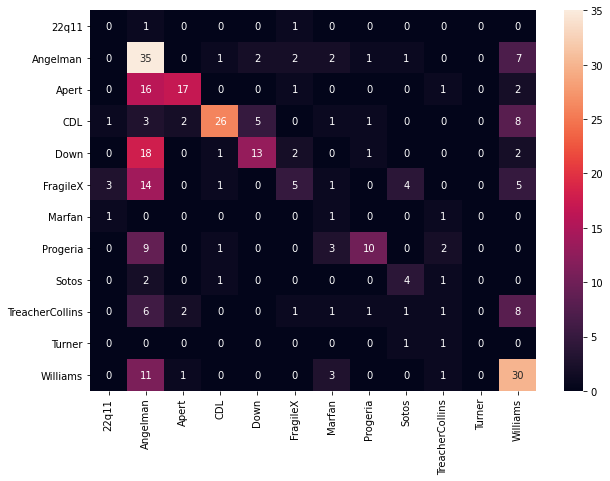

In [106]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(conf, index = [i for i in LABELS],
                  columns = [i for i in LABELS])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

## Neural Network Approach

In [107]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='adam', alpha=1e-4, hidden_layer_sizes=(100, 50), max_iter=2000, verbose=True, n_iter_no_change=500)
clf.fit(X_train, y_train)

Iteration 1, loss = inf
Iteration 2, loss = inf
Iteration 3, loss = inf
Iteration 4, loss = inf
Iteration 5, loss = inf
Iteration 6, loss = inf
Iteration 7, loss = inf
Iteration 8, loss = inf
Iteration 9, loss = inf
Iteration 10, loss = inf
Iteration 11, loss = inf
Iteration 12, loss = inf
Iteration 13, loss = inf
Iteration 14, loss = inf
Iteration 15, loss = inf
Iteration 16, loss = inf
Iteration 17, loss = inf
Iteration 18, loss = inf
Iteration 19, loss = inf
Iteration 20, loss = inf
Iteration 21, loss = inf
Iteration 22, loss = inf
Iteration 23, loss = inf
Iteration 24, loss = inf
Iteration 25, loss = inf
Iteration 26, loss = inf
Iteration 27, loss = inf
Iteration 28, loss = inf
Iteration 29, loss = inf
Iteration 30, loss = inf
Iteration 31, loss = inf
Iteration 32, loss = inf
Iteration 33, loss = inf
Iteration 34, loss = inf
Iteration 35, loss = inf
Iteration 36, loss = inf
Iteration 37, loss = inf
Iteration 38, loss = inf
Iteration 39, loss = inf
Iteration 40, loss = inf
Iteration

Iteration 279, loss = 2.22057267
Iteration 280, loss = 2.22035151
Iteration 281, loss = 2.22018544
Iteration 282, loss = 2.21997796
Iteration 283, loss = 2.21980142
Iteration 284, loss = 2.21961234
Iteration 285, loss = 2.21942289
Iteration 286, loss = 2.21920741
Iteration 287, loss = 2.21901834
Iteration 288, loss = 2.21880163
Iteration 289, loss = 2.21860764
Iteration 290, loss = 2.21840499
Iteration 291, loss = 2.21821459
Iteration 292, loss = 2.21802265
Iteration 293, loss = 2.21784163
Iteration 294, loss = 2.21767966
Iteration 295, loss = 2.21749813
Iteration 296, loss = 2.21734063
Iteration 297, loss = 2.21718904
Iteration 298, loss = 2.21700383
Iteration 299, loss = 2.21681943
Iteration 300, loss = 2.21668326
Iteration 301, loss = 2.21648992
Iteration 302, loss = 2.21631896
Iteration 303, loss = 2.21616537
Iteration 304, loss = 2.21599488
Iteration 305, loss = 2.21584429
Iteration 306, loss = 2.21569791
Iteration 307, loss = 2.21551105
Iteration 308, loss = 2.21535817
Iteration 

Iteration 532, loss = 2.20023684
Iteration 533, loss = 2.20022080
Iteration 534, loss = 2.20018559
Iteration 535, loss = 2.20016129
Iteration 536, loss = 2.20011487
Iteration 537, loss = 2.20009306
Iteration 538, loss = 2.20006289
Iteration 539, loss = 2.20003295
Iteration 540, loss = 2.20000876
Iteration 541, loss = 2.19998829
Iteration 542, loss = 2.19995686
Iteration 543, loss = 2.19992857
Iteration 544, loss = 2.19990929
Iteration 545, loss = 2.19990304
Iteration 546, loss = 2.19987075
Iteration 547, loss = 2.19984640
Iteration 548, loss = 2.19983344
Iteration 549, loss = 2.19981367
Iteration 550, loss = 2.19978199
Iteration 551, loss = 2.19978000
Iteration 552, loss = 2.19974852
Iteration 553, loss = 2.19970010
Iteration 554, loss = 2.19967608
Iteration 555, loss = 2.19964307
Iteration 556, loss = 2.19962726
Iteration 557, loss = 2.19961525
Iteration 558, loss = 2.19959140
Iteration 559, loss = 2.19957326
Iteration 560, loss = 2.19954866
Iteration 561, loss = 2.19952512
Iteration 

Iteration 787, loss = 2.19663505
Iteration 788, loss = 2.19661204
Iteration 789, loss = 2.19663396
Iteration 790, loss = 2.19660011
Iteration 791, loss = 2.19658924
Iteration 792, loss = 2.19658646
Iteration 793, loss = 2.19659470
Iteration 794, loss = 2.19657151
Iteration 795, loss = 2.19657721
Iteration 796, loss = 2.19656670
Iteration 797, loss = 2.19658027
Iteration 798, loss = 2.19656099
Iteration 799, loss = 2.19656694
Iteration 800, loss = 2.19655385
Iteration 801, loss = 2.19653855
Iteration 802, loss = 2.19652674
Iteration 803, loss = 2.19652295
Iteration 804, loss = 2.19651788
Iteration 805, loss = 2.19651439
Iteration 806, loss = 2.19653084
Iteration 807, loss = 2.19653417
Iteration 808, loss = 2.19651877
Iteration 809, loss = 2.19651904
Iteration 810, loss = 2.19651983
Iteration 811, loss = 2.19652271
Iteration 812, loss = 2.19650995
Iteration 813, loss = 2.19650319
Iteration 814, loss = 2.19651566
Iteration 815, loss = 2.19648679
Iteration 816, loss = 2.19648744
Iteration 

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 50), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=2000,
              momentum=0.9, n_iter_no_change=500, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=True,
              warm_start=False)

In [108]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


y_pred = clf.predict(X_train)

accuracy = accuracy_score(y_train, y_pred, normalize=False) / float(y_train.size)
print('accuracy',accuracy)

conf = confusion_matrix(y_train,y_pred)

accuracy 0.15933528836754643


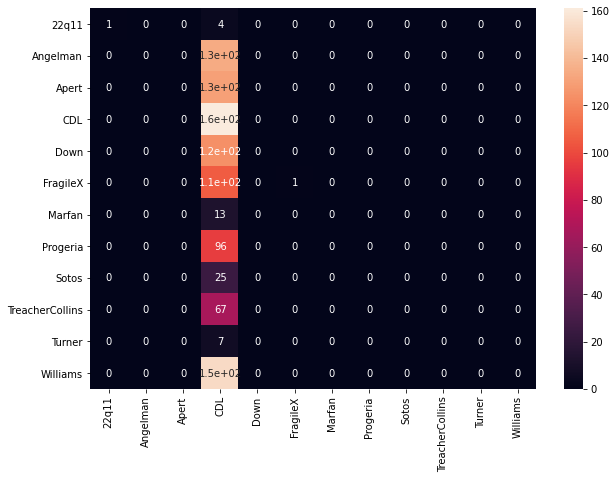

In [109]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(conf, index = [i for i in LABELS],
                  columns = [i for i in LABELS])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

In [110]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred, normalize=False) / float(y_test.size)
print('accuracy',accuracy)

conf = confusion_matrix(y_test,y_pred)

accuracy 0.14423076923076922


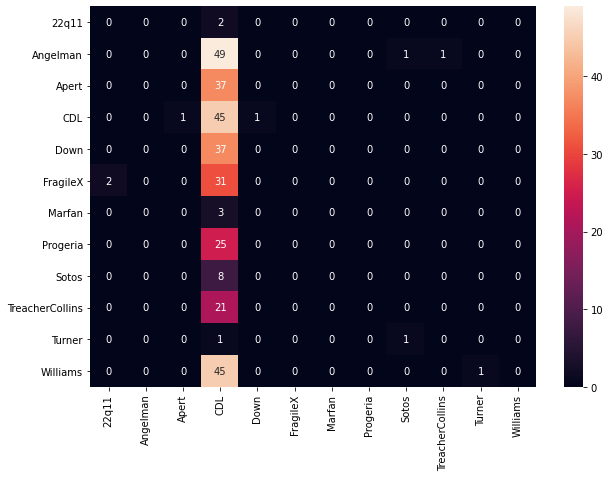

In [111]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(conf, index = [i for i in LABELS],
                  columns = [i for i in LABELS])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

## PCA SVM

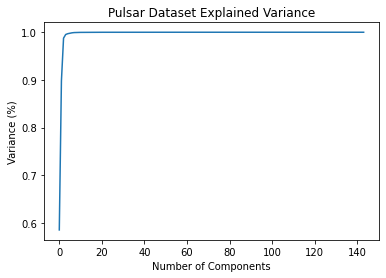

In [112]:
import numpy as np
from sklearn.decomposition import PCA 

pca = PCA().fit(X_train)

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()

In [113]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [114]:
from sklearn.svm import LinearSVC

clf = LinearSVC(random_state=0, tol=1e-5, max_iter=10000)
clf.fit(X_train_pca, y_train)
print(clf.coef_)
print(clf.intercept_)

[[ 1.72833121e-05  1.43453624e-05  6.47200064e-05  2.49374572e-05
  -1.57819178e-05  4.34679582e-05 -1.49753542e-05  7.91418841e-05
   4.76911316e-05  7.38648458e-05]
 [ 7.59854604e-06 -1.78265044e-05  3.82237311e-05  4.59696081e-05
  -8.14423518e-05  7.62984754e-05  2.61565567e-05 -6.17504423e-05
   6.75542301e-05 -7.86331751e-05]
 [-3.99037297e-05  7.34271672e-06 -5.06584510e-06  1.29206237e-05
  -1.77175221e-05 -2.13079823e-05 -7.71950090e-05  1.10630455e-04
  -1.05529621e-04 -2.97978951e-05]
 [ 1.62996932e-05  3.02451068e-05 -1.63344435e-05  4.29232094e-05
  -2.77210426e-05 -6.11606297e-05 -9.88860609e-05  5.00514945e-05
   1.84627205e-04  1.19894384e-04]
 [-3.05012388e-06  2.49435319e-05  6.00495298e-06  5.68862512e-05
  -3.48646893e-05  6.12040144e-05 -9.08133179e-05  8.76469956e-05
   4.56920524e-05 -1.01404809e-04]
 [-5.23328590e-06  1.84911711e-05  5.26760269e-05 -1.17543821e-05
  -6.20545875e-05  4.85999652e-05 -1.90288187e-05  9.31045015e-05
   9.21096010e-05  6.17300876e-05

/home/curt/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [115]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


y_pred = clf.predict(X_train_pca)

accuracy = accuracy_score(y_train, y_pred, normalize=False) / float(y_train.size)
print('accuracy',accuracy)

conf = confusion_matrix(y_train,y_pred)

accuracy 0.1348973607038123


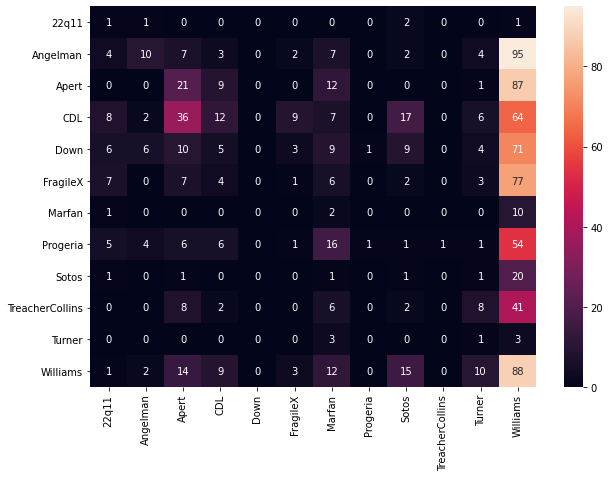

In [116]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(conf, index = [i for i in LABELS],
                  columns = [i for i in LABELS])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

In [117]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


y_pred = clf.predict(X_test_pca)

accuracy = accuracy_score(y_test, y_pred, normalize=False) / float(y_test.size)
print('accuracy',accuracy)

conf = confusion_matrix(y_test,y_pred)

accuracy 0.09935897435897435


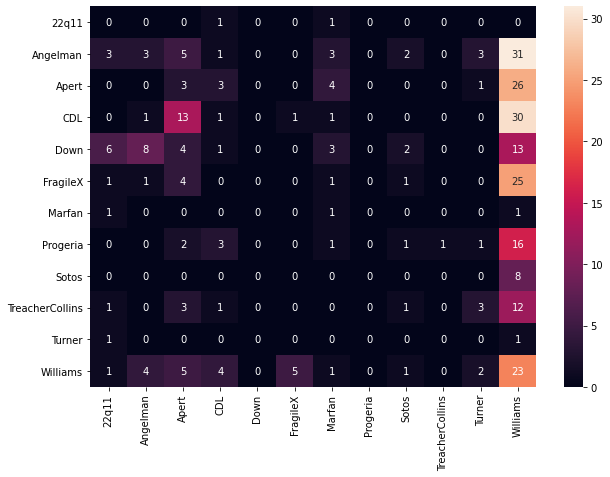

In [118]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(conf, index = [i for i in LABELS],
                  columns = [i for i in LABELS])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

## PCA Neural Network

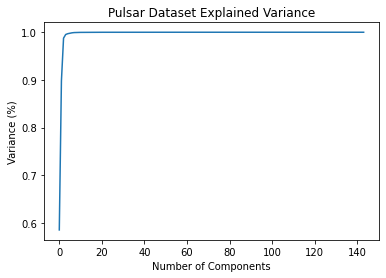

In [119]:
import numpy as np
from sklearn.decomposition import PCA 

pca = PCA().fit(X_train)

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()

In [120]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [121]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='adam', alpha=1e-4, hidden_layer_sizes=(100, 50), max_iter=2000, verbose=True, n_iter_no_change=500)
clf.fit(X_train_pca, y_train)

Iteration 1, loss = inf
Iteration 2, loss = inf
Iteration 3, loss = inf
Iteration 4, loss = inf
Iteration 5, loss = inf
Iteration 6, loss = inf
Iteration 7, loss = inf
Iteration 8, loss = inf
Iteration 9, loss = inf
Iteration 10, loss = inf
Iteration 11, loss = inf
Iteration 12, loss = inf
Iteration 13, loss = inf
Iteration 14, loss = inf
Iteration 15, loss = inf
Iteration 16, loss = inf
Iteration 17, loss = inf
Iteration 18, loss = inf
Iteration 19, loss = inf
Iteration 20, loss = inf
Iteration 21, loss = inf
Iteration 22, loss = inf
Iteration 23, loss = inf
Iteration 24, loss = inf
Iteration 25, loss = inf
Iteration 26, loss = inf
Iteration 27, loss = inf
Iteration 28, loss = inf
Iteration 29, loss = inf
Iteration 30, loss = inf
Iteration 31, loss = inf
Iteration 32, loss = inf
Iteration 33, loss = inf
Iteration 34, loss = inf
Iteration 35, loss = inf
Iteration 36, loss = inf
Iteration 37, loss = inf
Iteration 38, loss = inf
Iteration 39, loss = inf
Iteration 40, loss = inf
Iteration

Iteration 312, loss = 36.11259926
Iteration 313, loss = 37.49009545
Iteration 314, loss = 38.49470059
Iteration 315, loss = 25.48803399
Iteration 316, loss = 30.16174025
Iteration 317, loss = 32.63915354
Iteration 318, loss = 24.41780488
Iteration 319, loss = 23.02329529
Iteration 320, loss = 21.19492009
Iteration 321, loss = 31.47905326
Iteration 322, loss = 25.62322718
Iteration 323, loss = 24.58644795
Iteration 324, loss = 30.21702048
Iteration 325, loss = 23.10912753
Iteration 326, loss = 22.02122789
Iteration 327, loss = 24.80174261
Iteration 328, loss = 33.77338600
Iteration 329, loss = 31.65236341
Iteration 330, loss = 24.12465659
Iteration 331, loss = 24.90254363
Iteration 332, loss = 23.30101231
Iteration 333, loss = 20.92561140
Iteration 334, loss = 19.20513468
Iteration 335, loss = 18.62641499
Iteration 336, loss = 23.22187646
Iteration 337, loss = 24.22524542
Iteration 338, loss = 21.12655023
Iteration 339, loss = inf
Iteration 340, loss = inf
Iteration 341, loss = inf
Iter

Iteration 571, loss = 21.12119636
Iteration 572, loss = 20.82477635
Iteration 573, loss = 16.07830201
Iteration 574, loss = 15.20854037
Iteration 575, loss = 15.94485843
Iteration 576, loss = 17.06175453
Iteration 577, loss = 14.25766998
Iteration 578, loss = 12.30366775
Iteration 579, loss = 14.67624102
Iteration 580, loss = 18.95115419
Iteration 581, loss = 18.28862964
Iteration 582, loss = 15.33268443
Iteration 583, loss = 14.91087791
Iteration 584, loss = 15.95501652
Iteration 585, loss = 17.62938922
Iteration 586, loss = 14.68518399
Iteration 587, loss = 13.59636751
Iteration 588, loss = 10.70174210
Iteration 589, loss = 13.11533634
Iteration 590, loss = 15.81893942
Iteration 591, loss = 14.93925811
Iteration 592, loss = 18.30411370
Iteration 593, loss = 13.48874860
Iteration 594, loss = 13.56976049
Iteration 595, loss = 11.49661712
Iteration 596, loss = 10.78565730
Iteration 597, loss = 9.67837404
Iteration 598, loss = 11.40180827
Iteration 599, loss = 10.49963886
Iteration 600, 

Iteration 837, loss = inf
Iteration 838, loss = inf
Iteration 839, loss = inf
Iteration 840, loss = inf
Iteration 841, loss = inf
Iteration 842, loss = inf
Iteration 843, loss = inf
Iteration 844, loss = inf
Iteration 845, loss = 16.03027646
Iteration 846, loss = inf
Iteration 847, loss = 10.93163875
Iteration 848, loss = inf
Iteration 849, loss = inf
Iteration 850, loss = inf
Iteration 851, loss = inf
Iteration 852, loss = inf
Iteration 853, loss = inf
Iteration 854, loss = inf
Iteration 855, loss = 28.86467943
Iteration 856, loss = 22.81600638
Iteration 857, loss = 20.68692695
Iteration 858, loss = 15.72595373
Iteration 859, loss = 14.38630940
Iteration 860, loss = 12.27640770
Iteration 861, loss = 11.09187586
Iteration 862, loss = 12.12442417
Iteration 863, loss = 10.63487610
Iteration 864, loss = 11.70663927
Iteration 865, loss = 10.29481807
Iteration 866, loss = 13.41745541
Iteration 867, loss = 9.10224608
Iteration 868, loss = 7.71551948
Iteration 869, loss = 7.96808867
Iteration

Iteration 1104, loss = 5.43200246
Iteration 1105, loss = 3.93553715
Iteration 1106, loss = 3.57621838
Iteration 1107, loss = 3.94932816
Iteration 1108, loss = 3.13033189
Iteration 1109, loss = 2.63884989
Iteration 1110, loss = 2.22953931
Iteration 1111, loss = 2.20534829
Iteration 1112, loss = 1.88897683
Iteration 1113, loss = 2.16100695
Iteration 1114, loss = 1.67480633
Iteration 1115, loss = 1.54369089
Iteration 1116, loss = 1.60409173
Iteration 1117, loss = 1.60955179
Iteration 1118, loss = 1.88600110
Iteration 1119, loss = 1.63382589
Iteration 1120, loss = 1.52999047
Iteration 1121, loss = 1.51979443
Iteration 1122, loss = 1.41479606
Iteration 1123, loss = 1.32655262
Iteration 1124, loss = 1.35461768
Iteration 1125, loss = 1.35714805
Iteration 1126, loss = 1.33579908
Iteration 1127, loss = 1.41892890
Iteration 1128, loss = 1.38053506
Iteration 1129, loss = 1.32540212
Iteration 1130, loss = 1.41391656
Iteration 1131, loss = 1.49101225
Iteration 1132, loss = 1.34580947
Iteration 1133

Iteration 1345, loss = 1.11446370
Iteration 1346, loss = 1.11393701
Iteration 1347, loss = 1.11350301
Iteration 1348, loss = 1.11324131
Iteration 1349, loss = 1.11298767
Iteration 1350, loss = 1.11282836
Iteration 1351, loss = 1.11261873
Iteration 1352, loss = 1.11287042
Iteration 1353, loss = 1.11364560
Iteration 1354, loss = 1.11420596
Iteration 1355, loss = 1.11277181
Iteration 1356, loss = 1.11240391
Iteration 1357, loss = 1.11169192
Iteration 1358, loss = 1.11123573
Iteration 1359, loss = 1.11103668
Iteration 1360, loss = 1.11100758
Iteration 1361, loss = 1.11060420
Iteration 1362, loss = 1.11015911
Iteration 1363, loss = 1.11000032
Iteration 1364, loss = 1.10976863
Iteration 1365, loss = 1.10964294
Iteration 1366, loss = 1.10946989
Iteration 1367, loss = 1.10931950
Iteration 1368, loss = 1.10918899
Iteration 1369, loss = 1.10905192
Iteration 1370, loss = 1.10889528
Iteration 1371, loss = 1.10876863
Iteration 1372, loss = 1.10863184
Iteration 1373, loss = 1.10860962
Iteration 1374

Iteration 1592, loss = 2.88507373
Iteration 1593, loss = 2.82567627
Iteration 1594, loss = 3.07496344
Iteration 1595, loss = 2.45323478
Iteration 1596, loss = 2.50959016
Iteration 1597, loss = inf
Iteration 1598, loss = 2.86430912
Iteration 1599, loss = inf
Iteration 1600, loss = inf
Iteration 1601, loss = 4.23640154
Iteration 1602, loss = 3.36036783
Iteration 1603, loss = 3.04913523
Iteration 1604, loss = 3.05225607
Iteration 1605, loss = 3.90689247
Iteration 1606, loss = 3.76949434
Iteration 1607, loss = 2.97928278
Iteration 1608, loss = 2.58256474
Iteration 1609, loss = 2.31405997
Iteration 1610, loss = inf
Iteration 1611, loss = 3.13405088
Iteration 1612, loss = 2.48975849
Iteration 1613, loss = 2.26037358
Iteration 1614, loss = 2.00434280
Iteration 1615, loss = 1.86721533
Iteration 1616, loss = 1.84549702
Iteration 1617, loss = 1.68602765
Iteration 1618, loss = 1.67456468
Iteration 1619, loss = 1.66512462
Iteration 1620, loss = 1.61124138
Iteration 1621, loss = 1.60731922
Iteratio

Iteration 1839, loss = 1.48604812
Iteration 1840, loss = 1.48572719
Iteration 1841, loss = 1.48568483
Iteration 1842, loss = 1.48578175
Iteration 1843, loss = 1.48571142
Iteration 1844, loss = 1.48603114
Iteration 1845, loss = 1.48532104
Iteration 1846, loss = 1.48516555
Iteration 1847, loss = 1.48495807
Iteration 1848, loss = 1.48457889
Iteration 1849, loss = 1.48489708
Iteration 1850, loss = 1.48485480
Iteration 1851, loss = 1.48508380
Iteration 1852, loss = 1.48445522
Iteration 1853, loss = 1.48444621
Iteration 1854, loss = 1.48424165
Iteration 1855, loss = 1.48402223
Iteration 1856, loss = 1.48397065
Iteration 1857, loss = 1.48391436
Iteration 1858, loss = 1.48464852
Iteration 1859, loss = 1.48476611
Iteration 1860, loss = 1.48493930
Iteration 1861, loss = 1.48460809
Iteration 1862, loss = 1.48406949
Iteration 1863, loss = 1.48457535
Iteration 1864, loss = 1.48880178
Iteration 1865, loss = 1.49422852
Iteration 1866, loss = 1.49438490
Iteration 1867, loss = 1.49264255
Iteration 1868

/home/curt/.local/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 50), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=2000,
              momentum=0.9, n_iter_no_change=500, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=True,
              warm_start=False)

In [122]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


y_pred = clf.predict(X_train_pca)

accuracy = accuracy_score(y_train, y_pred, normalize=False) / float(y_train.size)
print('accuracy',accuracy)

conf = confusion_matrix(y_train,y_pred)

accuracy 0.4340175953079179


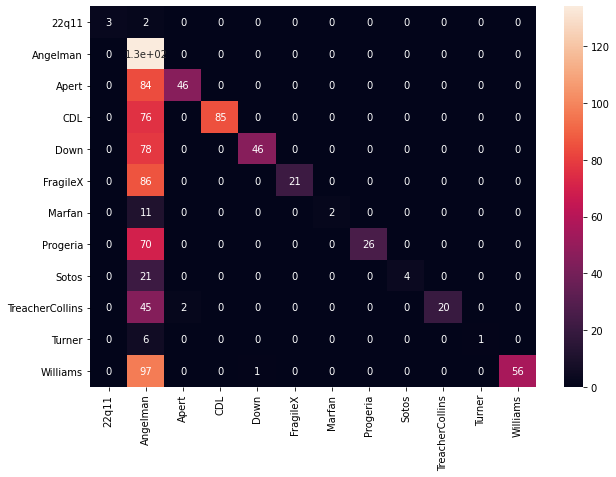

In [123]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(conf, index = [i for i in LABELS],
                  columns = [i for i in LABELS])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

In [124]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


y_pred = clf.predict(X_test_pca)

accuracy = accuracy_score(y_test, y_pred, normalize=False) / float(y_test.size)
print('accuracy',accuracy)

conf = confusion_matrix(y_test,y_pred)

accuracy 0.20192307692307693


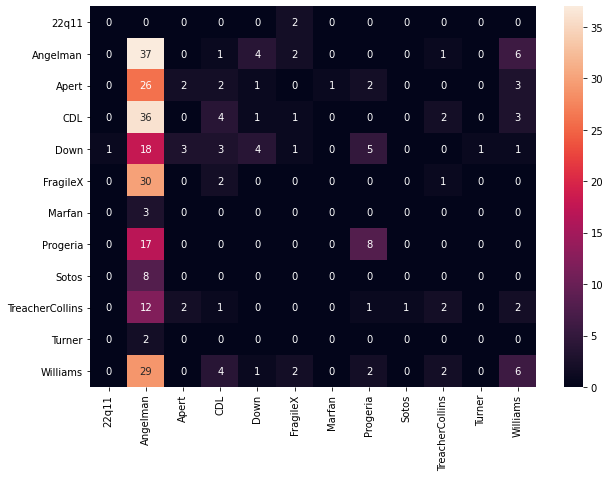

In [125]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(conf, index = [i for i in LABELS],
                  columns = [i for i in LABELS])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)